# Exercice 1: feature importance (result interpretation)

In [93]:
#(a) Load the ’Boston’ dataset
import pandas as pd

df = pd.read_csv("./boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [94]:
#b) Validate the predictive power of a random forest and a xgb regressor both with 500 trees on the Boston dataset.

#divide the dataset into a training dataset and a test dataset
X_train = df[:400]
X_test = df[400:]
Y_train = X_train['0']
Y_test = X_test['0']
X_train.drop(['0'], axis=1, inplace=True)
X_test.drop(['0'], axis=1, inplace=True)

C:\Users\33695\AppData\Local\Temp\ipykernel_40252\1411317173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['0'], axis=1, inplace=True)
C:\Users\33695\AppData\Local\Temp\ipykernel_40252\1411317173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['0'], axis=1, inplace=True)


In [95]:
#STEP 1 : xgboost 

import xgboost as xgb 

#create and fit the model with 500 trees
model = xgb.XGBRegressor(n_estimators=500)
model.fit(X_train, Y_train)

xgb_predictions = model.predict(X_test)

In [96]:
#STEP 2 : RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, Y_train)

randomforest_predictions = model.predict(X_test)

In [97]:
#using mse to compare results

from sklearn.metrics import mean_squared_error

xgb_mse = mean_squared_error(Y_test, xgb_predictions)
randomforest_mse = mean_squared_error(Y_test, randomforest_predictions)

print('xgb mse :',  xgb_mse)
print('random forest mse :',  randomforest_mse)

xgb mse : 18.700565177103723
random forest mse : 17.556311325660428


 * Both models have a predictive power

In [98]:
#(c) Train the previous models on the whole dataset and evaluate them on the same data.

X_whole = df.drop(['0'], axis=1)
Y_whole = df['0']

In [99]:
#random forest
model_rf = RandomForestRegressor(n_estimators=500)
model_rf.fit(X_whole, Y_whole)
whole_rf_predictions=model_rf.predict(X_whole)
whole_randomforest_mse = mean_squared_error(Y_whole, whole_rf_predictions)

#xgboost
model_xgb = xgb.XGBRegressor(n_estimators=500)
model_xgb.fit(X_whole, Y_whole)
whole_xgb_predictions=model_xgb.predict(X_whole)
whole_xgb_mse = mean_squared_error(Y_whole, whole_xgb_predictions)

print('xgb mse on whole data :',  whole_xgb_mse)
print('random forest mse on whole data :',  whole_randomforest_mse)

xgb mse on whole data : 1.9282491175256866e-06
random forest mse on whole data : 1.4047956009486093


* xgboost is the model that best predicts training values

In [100]:
#(d) Compute 2 types of feature importance according to the 2 regressors, plot them and conclude

features_rf = model_rf.feature_importances_
features_xgb = model_xgb.feature_importances_

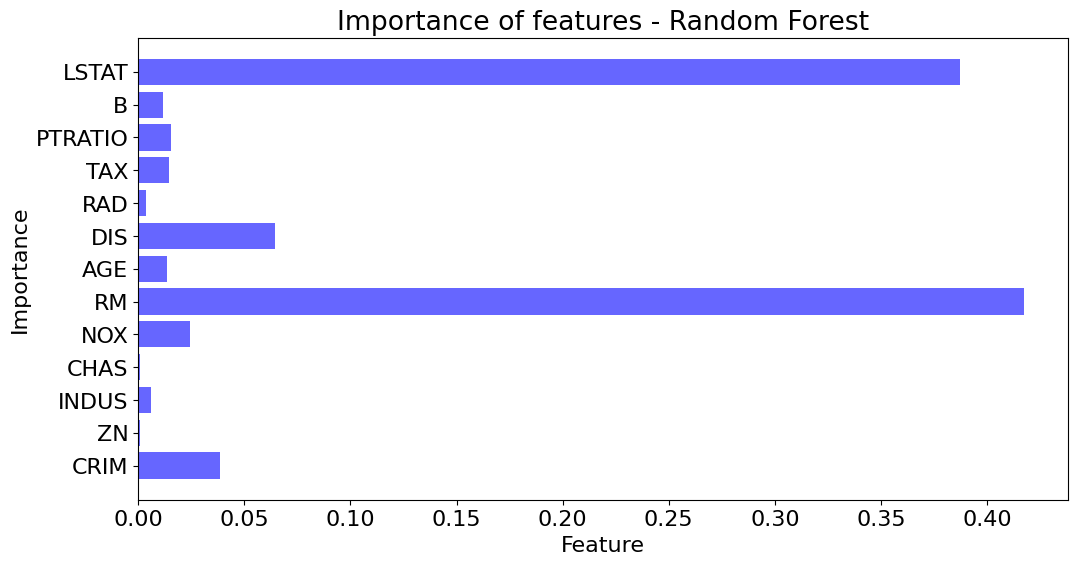

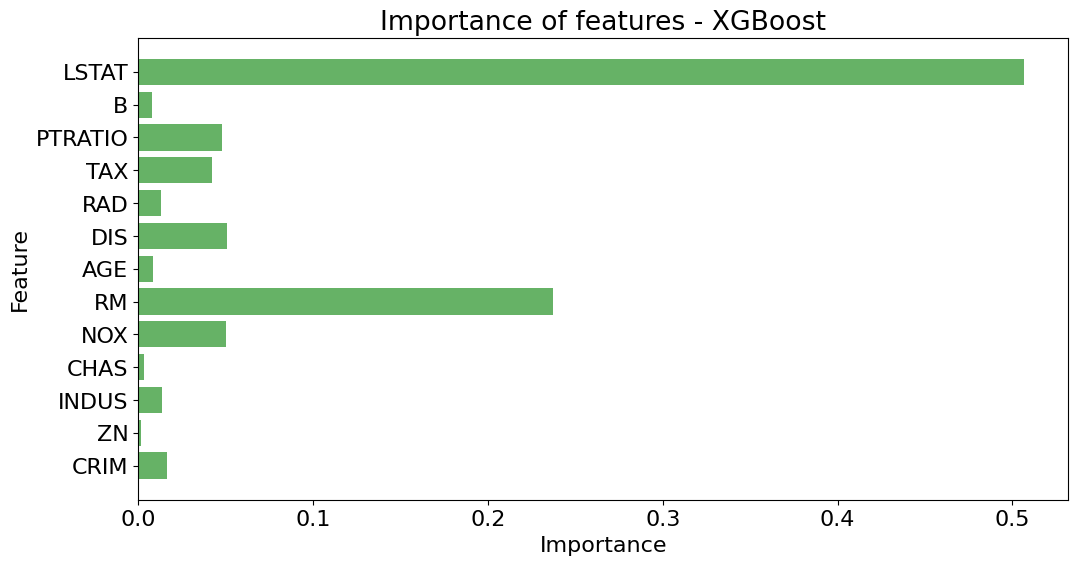

In [101]:
import matplotlib.pyplot as plt

feature_names = X_whole.columns

# Random Forest plotting
plt.figure(figsize=(12, 6))
plt.title('Importance of features - Random Forest')
plt.barh(feature_names, features_rf, color='blue', alpha=0.6)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

# XGBoost plotting
plt.figure(figsize=(12, 6))
plt.title('Importance of features - XGBoost')
plt.barh(feature_names, features_xgb, color='green', alpha=0.6)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

* In the two models, the features RM and LSTAT are the most important features.

# Exercice 2: models comparison

In [102]:
# (a) Import the wine dataset from this link 1 and plot the corresponding correlation matrix
# with a clear and readable heatmap that respect the following constraints:
# - the legend should include extreme correlations values (i.e. -1 and +1)
# - negative/positive correlations should be represented respectively by cold/warm colours
# - x-labels have to be rotated of 45◦
# - all variable names have to be clearly readable

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./wine.csv", sep = ";")
df.head()

,Alcohol,MalicAcid,Ash,AlcalinityOAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,colorIntensity,Hue,OD280.OD315.ofDilutedWines,Proline,class
0,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,class2
1,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,class2
2,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120,class1
3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650,class3
4,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,class3


In [103]:
X = df.drop(['class'], axis=1)
y = df['class']

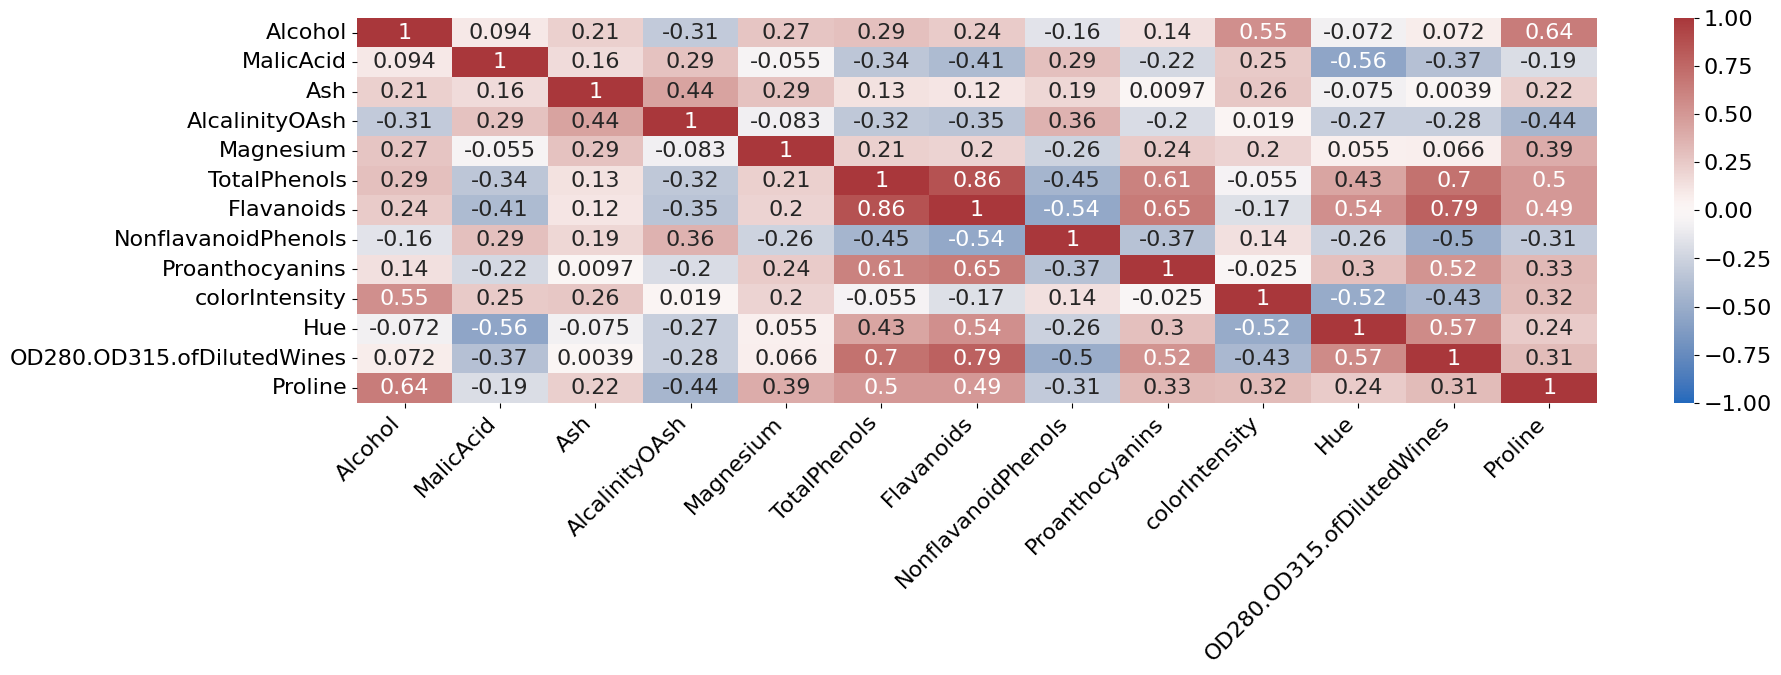

In [104]:
#plot the correlation matrix
plt.figure(figsize=(20, 5))
plt.rcParams['font.size'] = '16'
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [105]:
# (b) With the sklearn package set up a model comparison pipeline between a dummy classifier (predicting systematicaly the most frequent label of the training data), a decision tree, a
# kNN and a neural network models with a random sample containing 3/4 of the data for training and 1/4 for testing. Repeat this operation 100 times 
# draw the results in terms of means and boxplots and conclude

from sklearn.model_selection import train_test_split

#set variables
nb_iterations = 100
train_size = 3/4

#encode y (because xgboost needs y to be number question e)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [106]:
from sklearn.metrics import accuracy_score

'''define a function which returns a list of accuracy for a given model'''
def get_accuracy(model):
    iteration = 0
    list_accuracy = []
    while iteration < nb_iterations :
        #divide in a new train and test set at each iteration
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        list_accuracy.append(accuracy_score(y_test, y_pred))
        iteration += 1
    return list_accuracy

In [107]:
# a dummy classifier
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy="most_frequent")
dummy_accuracy = get_accuracy(dummy_model)

# a decision tree
from sklearn.tree import DecisionTreeClassifier

decisiontree_model = DecisionTreeClassifier(max_depth=1)
decisiontree_accuracy = get_accuracy(decisiontree_model)

# a KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2)
knn_accuracy = get_accuracy(knn_model)

# a neural network 
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(solver='adam', hidden_layer_sizes=(100,), max_iter=1000)
nn_accuracy = get_accuracy(nn_model)

C:\Users\33695\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33695\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33695\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\3369

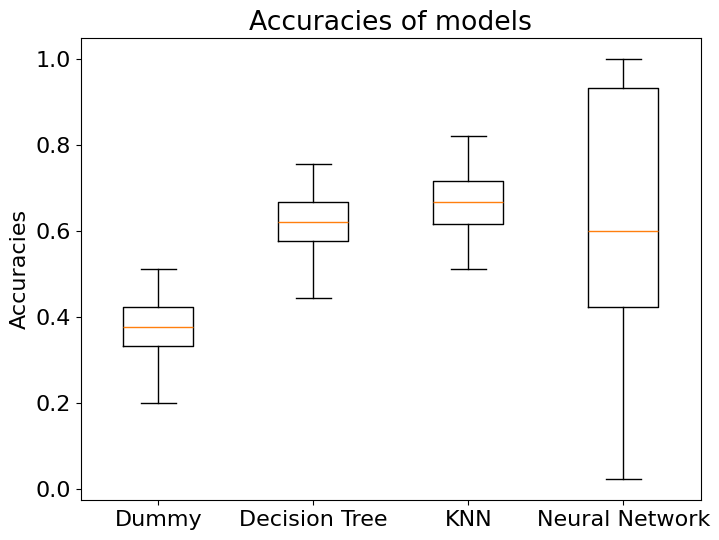

In [108]:
accuracies = [dummy_accuracy, decisiontree_accuracy, knn_accuracy, nn_accuracy]
labels = ["Dummy", "Decision Tree", "KNN", "Neural Network"]

plt.figure(figsize=(8, 6))
plt.boxplot(accuracies)
plt.xticks(range(1, 5), labels)
plt.title("Accuracies of models")
plt.ylabel("Accuracies")
plt.show()


* The Dummy model obviously obtains the worst accuracy because it only predicts the most represented class: however, it still obtains ~40% because there are not many different classes.
* With the parameters imposed, the DecisionTree and KNN models perform best (with the best averages and low variance).
* The neural network has very wide-ranging results: it has an accuracy of between 10% and 99%. The range of predictions is enormous.

If I have to use a single model to predict, maybe I will use the KNN because it has a good average or I will try to adjust parameters of our models.

In [109]:
#(c) Add hard and a soft votes approaches to the pipeline of question (b) and comment the results.
from sklearn.ensemble import VotingClassifier

In [110]:
#hard vote : class with more votes is the output
hard_model = VotingClassifier(estimators=[('Dummy', dummy_model), ('Decision Tree', decisiontree_model), ('KNN', knn_model), ('Neural Network', nn_model)], voting='hard')

#soft vote : class with best average of probability predict by each model is the output
soft_model = VotingClassifier(estimators=[('Dummy', dummy_model), ('Decision Tree', decisiontree_model), ('KNN', knn_model), ('Neural Network', nn_model)], voting='soft')

#get the two lists of accuracies
hard_accuracy = get_accuracy(hard_model)
soft_accuracy = get_accuracy(soft_model)

C:\Users\33695\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33695\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33695\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\3369

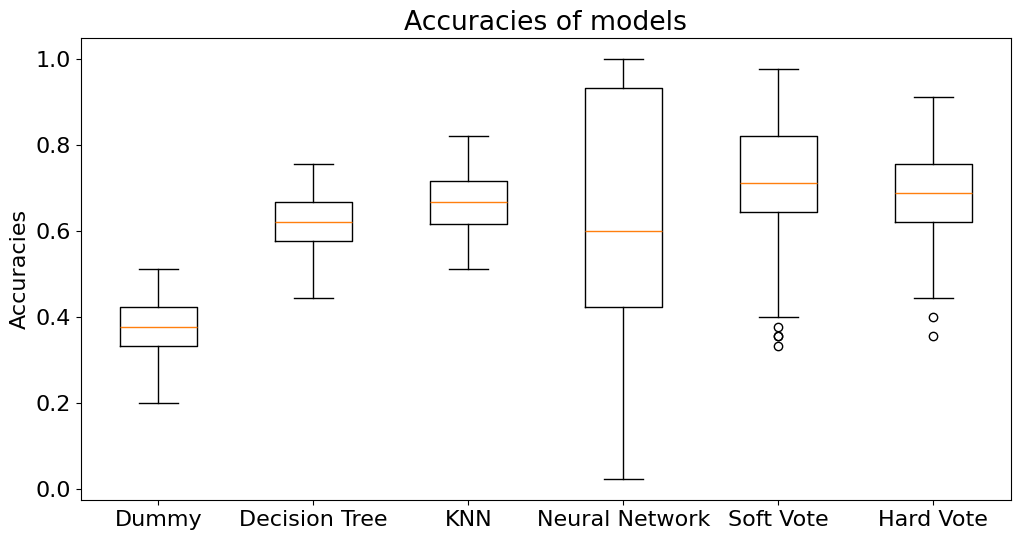

In [111]:
accuracies_vote = [dummy_accuracy, decisiontree_accuracy, knn_accuracy, nn_accuracy, soft_accuracy, hard_accuracy]

labels = ["Dummy", "Decision Tree", "KNN", "Neural Network", "Soft Vote", "Hard Vote"]
plt.figure(figsize=(12, 6))
plt.boxplot(accuracies_vote)
plt.xticks(range(1, 7), labels)
plt.title("Accuracies of models")
plt.ylabel("Accuracies")
plt.show()

* We notice that models with votes give us better averages than the models alone.
* It permits melting the differents approachs from the different models
* Maybe we can add other models which works and delete some which have less predict power because some outliers appear.

In [112]:
#(d) Try a stacking approach (with the same 3 single classifiers as before), add it to the comparison of the previous question and comment the results.

from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(estimators=[('Dummy', dummy_model), ('Decision Tree', decisiontree_model), ('KNN', knn_model)], final_estimator=nn_model)
stacking_accuracy = get_accuracy(stacking_model)

C:\Users\33695\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33695\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


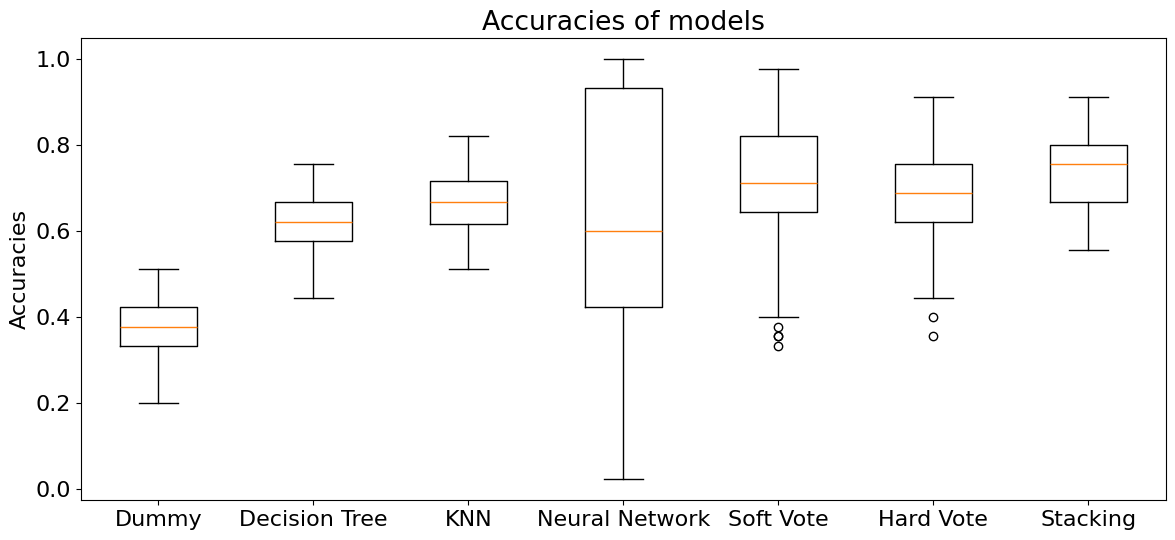

In [113]:
accuracies_stacking = [dummy_accuracy, decisiontree_accuracy, knn_accuracy, nn_accuracy, soft_accuracy, hard_accuracy, stacking_accuracy]
labels = ["Dummy", "Decision Tree", "KNN", "Neural Network", "Soft Vote", "Hard Vote", "Stacking"]

plt.figure(figsize=(14, 6))
plt.boxplot(accuracies_stacking)
plt.xticks(range(1, 8), labels)
plt.title("Accuracies of models")
plt.ylabel("Accuracies")
plt.show()

* The stacking approach leads to better results another time by melting the differents approachs
* It is the best accuracy, the standard deviation is low and there are no outlier values

In [114]:
#(e) Add a random forest, an AdaBoost, a gradient bossting and a XGBoost to the pipeline and comment the results.

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Random Forest
rf_model = RandomForestClassifier()
rf_accuracy = get_accuracy(rf_model)

# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_accuracy = get_accuracy(adaboost_model)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_accuracy = get_accuracy(gb_model)

# XGBoost
xgb_model = XGBClassifier()
xgb_accuracy = get_accuracy(xgb_model)

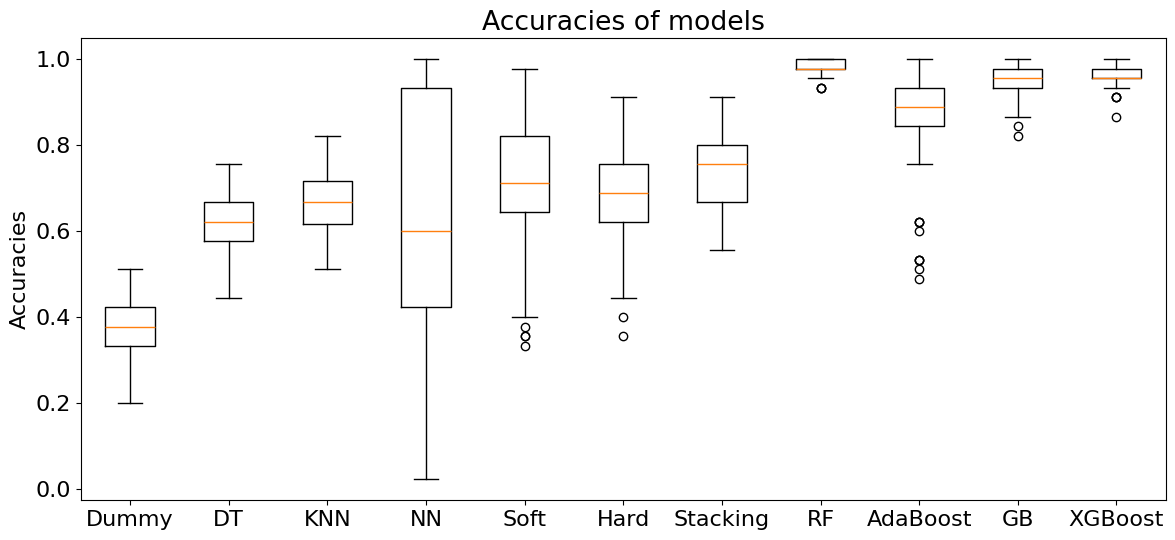

In [115]:
accuracies_advanced_models = [dummy_accuracy, decisiontree_accuracy, knn_accuracy, nn_accuracy, soft_accuracy, hard_accuracy, stacking_accuracy, rf_accuracy, adaboost_accuracy, gb_accuracy, xgb_accuracy]
labels = ["Dummy", "DT", "KNN", "NN", "Soft", "Hard", "Stacking", "RF", "AdaBoost", "GB", "XGBoost"]

plt.figure(figsize=(14, 6))
plt.boxplot(accuracies_advanced_models)
plt.xticks(range(1, 12), labels)
plt.title("Accuracies of models")
plt.ylabel("Accuracies")
plt.show()

* The results of these advanced models are very impressive : there is a 15% performance gap with the Stacking model, which was the best at the time.
* Among the new models, Random Forest seems to be the better on with a result between 92 and 100% while the other obtain sometimes outliers or an accuracy below 80%.
* The model XGBoost gets impressive results also. 

In [123]:
#(f) Tune the forest size (i.e. number of trees) with a grid-search approach and with a Bayes-search approach on the whole dataset.

# GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,200]
}

grid_search = GridSearchCV(rf_model, scoring='accuracy', param_grid=param_grid)
grid_search.fit(X, y) #on the whole dataset

print(grid_search.best_params_)

{'n_estimators': 30}


* Bayes Search does not work : I couldn't work out which integers were the problem with Numpy's version.

In [124]:
#Bayes Search
from skopt import BayesSearchCV

search_spaces = {
    'n_estimators': list(range(10, 201,10))
}

bayes_search = BayesSearchCV(rf_model, search_spaces=search_spaces, scoring='accuracy')
bayes_search.fit(X, y) #on the whole dataset too

print(bayes_search.get_params)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [126]:
#(g) Realise a comparison between random forest and XGB with a 10-fold cross validation procedure after having tuned their sizes (number of weak classifiers) and their depths on
# the whole dataset. What is wrong with our tuning strategy?

#STEP 1 : find the best max_depth

param_grid = {
    'max_depth': [1,3,5,7,9,12,15]
}

#Random Forest (with 30 estimators according to the question f)

rf_adjust = RandomForestClassifier(n_estimators=30)

grid_search = GridSearchCV(rf_model, scoring='accuracy', param_grid=param_grid)
grid_search.fit(X, y) #on the whole dataset

print('rf: ', grid_search.best_params_)

#XGBoost model

grid_search = GridSearchCV(xgb_model, scoring='accuracy', param_grid=param_grid)
grid_search.fit(X, y) #on the whole dataset

print('xgb: ', grid_search.best_params_)

rf:  {'max_depth': 3}
xgb:  {'max_depth': 1}


* The two final models are Random Forest with 30 estimators and 3 max_depth and XGBoost with 1 max_depth

In [134]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

rf_final_model = RandomForestClassifier(n_estimators=30, max_depth=3)
xgb_final_model = XGBClassifier(max_depth=1)

# Cross validation on the whole dataset
rf_scores = cross_val_score(rf_model, X, y, cv=KFold(n_splits=10), scoring='accuracy')
xgb_scores = cross_val_score(xgb_model, X, y, cv=KFold(n_splits=10), scoring='accuracy')

print("rf mean accuracy:", rf_scores.mean())
print("xgboost mean accuracy:", xgb_scores.mean())

rf mean accuracy: 0.9722222222222221
xgboost mean accuracy: 0.9663398692810456


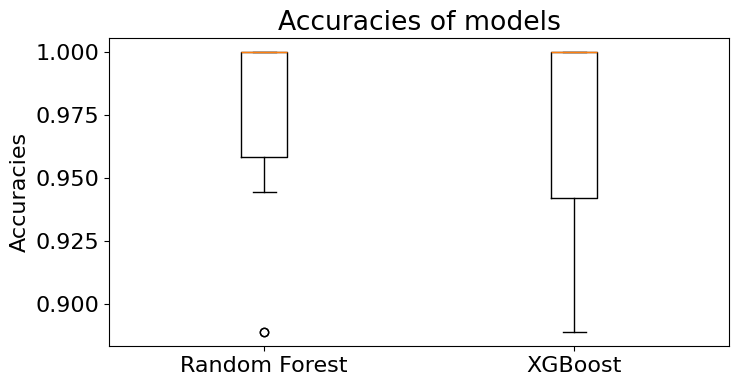

In [138]:
#Boxplot
scores = [rf_scores, xgb_scores]
labels = ["Random Forest", "XGBoost"]

plt.figure(figsize=(8, 4))
plt.boxplot(scores)
plt.xticks(range(1, 3), labels)
plt.title("Accuracies of models")
plt.ylabel("Accuracies")
plt.show()

* The Random Forest with these parameters seems to be the best predict model. The result is very impressive. 
* The problem of this procedure is that we have fix the number of estimators and then find the best max_depth but whe can obtain other results if we first find the best hyperparameter max_depth
* Also, we have work on the whole dataset so even if we do cross validation, we have used data that the model is supposed to not know. Maybe some data will not be used in the training process.

In [ ]:
#(h) Realise the complete models comparison of previous question with a proper tuning step for all models’ main hyperparameters.